# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

**Para realizar el taller:**

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python.

**Para el envío:**

Al terminar el taller, y dentro de las fechas especificadas en la plataforma de OLADE, debe subir este archivo a su perfil de **GitHub**. En la plataforma debe copiar el enlace a este archivo, a modo de entregable. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd
                
x=[]

for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else:
        skip=2
   
    nombrearchivo= 'Precio_Bolsa_Nacional_($kwh)_'+str(n)
    if n>=2016:
        nombrearchivo +='.xls'
    else:
        nombrearchivo+='.xlsx'
        
    y = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols=24)
    x.append(y)
    z=pd.concat(x)
    

In [2]:
z.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
len(z)-len (z.dropna())

28

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
len(z)-len(z.drop_duplicates())

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
z=z.dropna().drop_duplicates()

In [6]:
len(z)

7875

**5.--** Compute y grafique el precio primedio diario.

In [7]:
prom = z.mean(axis=1)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


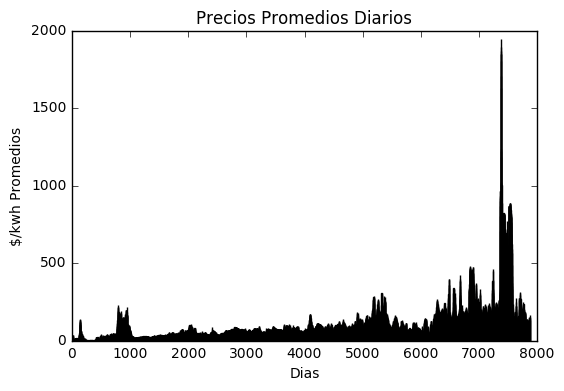

In [9]:
plt.xlabel('Dias')
plt.ylabel('$/kwh Promedios')
plt.title('Precios Promedios Diarios')
plt.bar(range(len(prom)),prom)
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [10]:
w=[]
for n in range(len(z['Fecha'])):
    w.append (str(z.iloc[n,0])[0:7])
z['aniomes']=w
maxmes = z.groupby('aniomes').max()
maxmes= maxmes.max(axis=1)


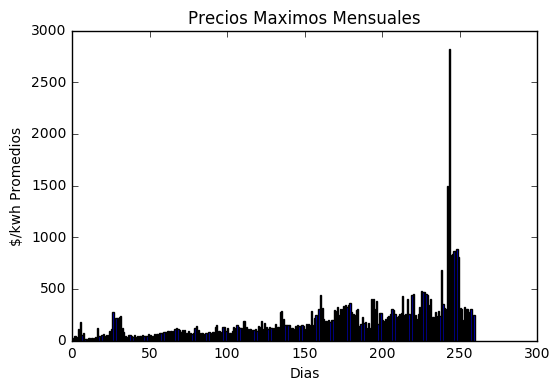

In [11]:
plt.xlabel('Dias')
plt.ylabel('$/kwh Promedios')
plt.title('Precios Maximos Mensuales')
plt.bar(range(len(maxmes)),maxmes)
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

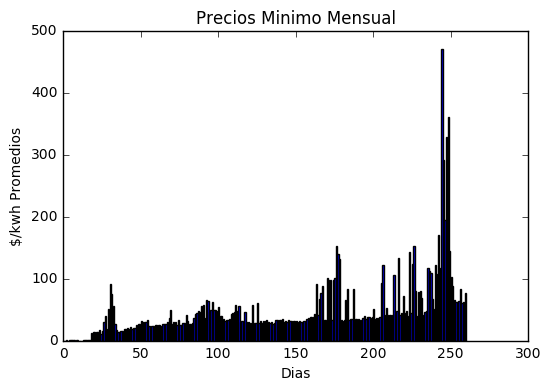

In [12]:
minmes = z.groupby('aniomes').min()
minmes = minmes.min(axis=1)
plt.xlabel('Dias')
plt.ylabel('$/kwh Promedios')
plt.title('Precios Minimo Mensual')
plt.bar(range(len(minmes)),minmes)
plt.show()


**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

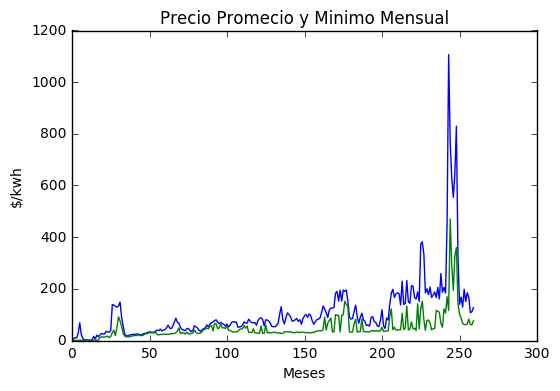

In [13]:
prommes = z.groupby('aniomes').mean()
prommes= prommes.mean(axis=1)
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
plt.title('Precio Promecio y Minimo Mensual')
plt.plot(pd.Series(prommes).values)        
plt.plot(pd.Series(minmes).values)  

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [14]:
from datetime import datetime, date, time, timedelta
import calendar

#Define los Dias de la semana en base a la Fecha
fecha=[]
fecha=z['Fecha']
z['Fecha']=pd.to_datetime(z['Fecha'], format="%Y-%m-%d")
z['Dia']=z['Fecha'].dt.weekday_name

#Filtrado de Dias por Laborales.
Lab = z['Dia'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
Lab = z[Lab]


In [15]:
indicador = ['{}'.format(n) for n in range(len(Lab))]
Lab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 


In [16]:
u=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Lab)):
    x = pd.Series(Lab.loc[str(n)]).values[1:25]
    u.append ([i for i, e in enumerate(x) if e == max(x)])


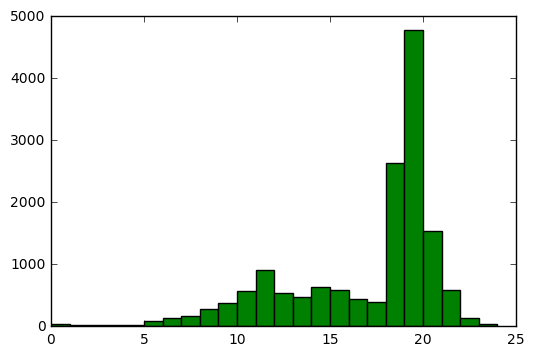

In [17]:
a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(u)):
    for i in range (len(u[n])):
        a.append(u[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.bar(range(24),rep,color='g',width = 1)
plt.show()


**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

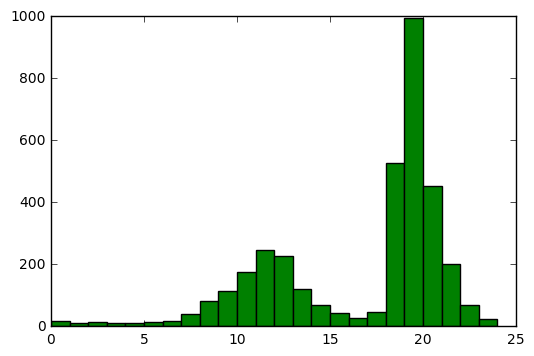

In [18]:
#Filtrado de Dias por Laborales.
Sab = z['Dia'].isin(['Saturday'])
Sab = z[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 

s=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.bar(range(24),rep,color='g',width = 1)
plt.show()


**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

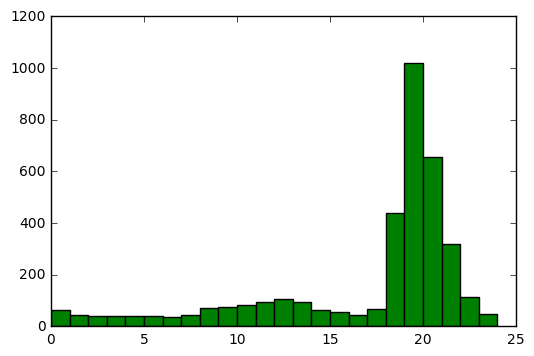

In [19]:
#Filtrado de Dias por Laborales.
Sab = z['Dia'].isin(['Sunday'])
Sab = z[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador
#Lab.head()# A este nivel la Matriz ya no contiene 

s=[]                                 # Este Fragmento de Codigo devuelve la columna del valor Maximo de la matriz de dias laborales
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.bar(range(24),rep,color='g',width = 1)
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [20]:
A=[]
nmatriz=z
for n in range(len(nmatriz['Fecha'])):
    A.append (str(nmatriz.iloc[n,0])[0:4])
nmatriz['anio']=A
minanio = nmatriz.groupby('anio').min()
minanio= minanio.min(axis=1)

In [21]:
minanio

anio
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [22]:
indicador = ['{}'.format(n) for n in range(len(z))]
z.index = indicador


z['aniomes'][10]



'1995-07'

In [39]:
# con esto puedo calcular el promedio en funcion de n cuando n va hasta la longuitud de z
y=z.groupby('aniomes')
f=z.loc[y.groups[z['aniomes'][43]]].mean() #El entero sera n
f.mean()

10.955819444444446

In [45]:
pmes=[]
for n in range (len(z)):
    y=z.groupby('aniomes')
    f=z.loc[y.groups[z['aniomes'][n]]].mean() #El entero sera n
    f=f.mean()
    pmes.append(f)

    

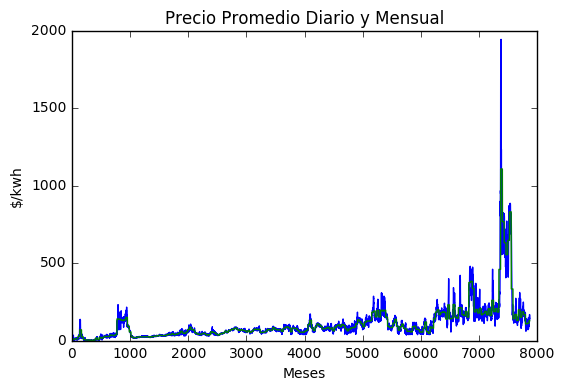

In [49]:
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
plt.title('Precio Promedio Diario y Mensual')
plt.plot(pd.Series(prom).values)        
plt.plot(pd.Series(pmes).values) 